In [16]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [40]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3) #quoting = 3 to ignore the double quotes in the file

In [3]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
Review    1000 non-null object
Liked     1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [5]:
data.shape

(1000, 2)

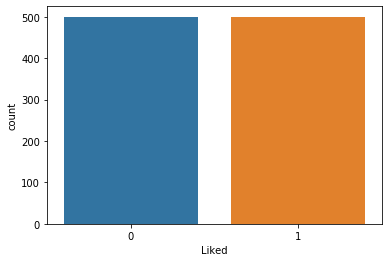

In [6]:
sb.countplot(data['Liked'])
plt.show()

# Cleaning the texts

cleaning the 1st row of text 

In [7]:
data['Review'][0]

'Wow... Loved this place.'

Getting rid of all the punctuations / Keeping only the alphabets in lowercase or uppercase

In [8]:
review = re.sub('[^a-z,A-Z]',  ' ', data['Review'][0]) #all the things followed by the ^ is what we don't want to remove

In [9]:
review

'Wow    Loved this place '

Converting all the uppercase characters to lowercase

In [10]:
review = review.lower()

In [11]:
review

'wow    loved this place '

stopwords

In [12]:
review = word_tokenize(review)

In [13]:
review

['wow', 'loved', 'this', 'place']

In [14]:
stop_words = set(stopwords.words('english'))

In [15]:
review = [w for w in review if w not in stop_words]

In [16]:
review

['wow', 'loved', 'place']

# Stemming

In [17]:
stemmer = SnowballStemmer('english')

In [18]:
review = [stemmer.stem(w) for w in review]

In [19]:
review

['wow', 'love', 'place']

# Untokenizing

In [20]:
a = (TreebankWordDetokenizer().detokenize(review))

In [21]:
type(a)

str

Cleaning all the texts

In [22]:
corpus = [ ]

In [23]:
for i in range(0, 1000):
    review = re.sub('[^a-z,A-Z]',  ' ', data['Review'][i])
    review = review.lower()
    review = word_tokenize(review)
    stop_words = set(stopwords.words('english'))
    review = [w for w in review if w not in stop_words]
    stemmer = SnowballStemmer('english')
    review = [stemmer.stem(w) for w in review]
    review = TreebankWordDetokenizer().detokenize(review)
    
    
    corpus.append(review)

In [24]:
corpus

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli, chicken, cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'high recommend',
 'waitress littl slow servic',
 'place worth time, let alon vega',
 'like',
 'burritto blah',
 'food, amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco, friend staff',
 'took hour get food tabl restaur food luke warm, sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger, fri, beer decent deal',
 'like final blow',
 'found place

# Creating a Bag of Words model

Bag of Words Model - Creating feature out of corpus

In [25]:
cv = CountVectorizer(max_features = 1500)

In [26]:
X = cv.fit_transform(corpus).toarray()

In [27]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [28]:
X.shape

(1000, 1500)

In [29]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [30]:
y = data.iloc[:, -1:].values

In [31]:
y.shape

(1000, 1)

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [41]:
classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [34]:
y_pred[0:10]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1])

In [35]:
accuracy = accuracy_score(y_test, y_pred)

In [36]:
accuracy

0.74

In [37]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[56, 41],
       [11, 92]])